In [24]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.9 MB/s eta 0:00:00


In [9]:
# Data Loading and Initial Exploration
# Read the data
df = pd.read_excel('Telco_customer_churn.xlsx')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display first few rows
print("\nFirst few rows of the dataset:")
display(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Dataset Shape: (7043, 33)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-nul

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices



Missing values in each column:
CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


In [8]:
# Project Title: Advanced Customer Churn Analysis and Prediction System
# Author: Surbhit Jangra
# Date: February 2025

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

# Set styling for visualizations
sns.set_theme()  # This sets the seaborn styling
sns.set_palette("husl")

In [10]:
# Print column names to see what's available
print("Available columns:", df.columns.tolist())

Available columns: ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [12]:
# Convert 'Total Charges' to numeric, handling any potential non-numeric values
df['Total Charges'] = pd.to_numeric(df['Total Charges'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Create new features
df['Average_Monthly_Charges'] = df['Total Charges'] / df['Tenure Months']  # Note the space in column names
df['Services_Count'] = df[['Phone Service', 'Internet Service', 'Online Security',
                          'Online Backup', 'Device Protection', 'Tech Support',
                          'Streaming TV', 'Streaming Movies']].apply(lambda x: x.str.count('Yes')).sum(axis=1)

# Convert categorical variables to numeric
categorical_columns = ['Gender', 'Partner', 'Dependents', 'Phone Service', 'Internet Service', 'Contract']  # Note the spaces
le = LabelEncoder()
for col in categorical_columns:
    df[col + '_Encoded'] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Average_Monthly_Charges']
scaled_columns = [col + '_Scaled' for col in numerical_columns]
df[scaled_columns] = scaler.fit_transform(df[numerical_columns])

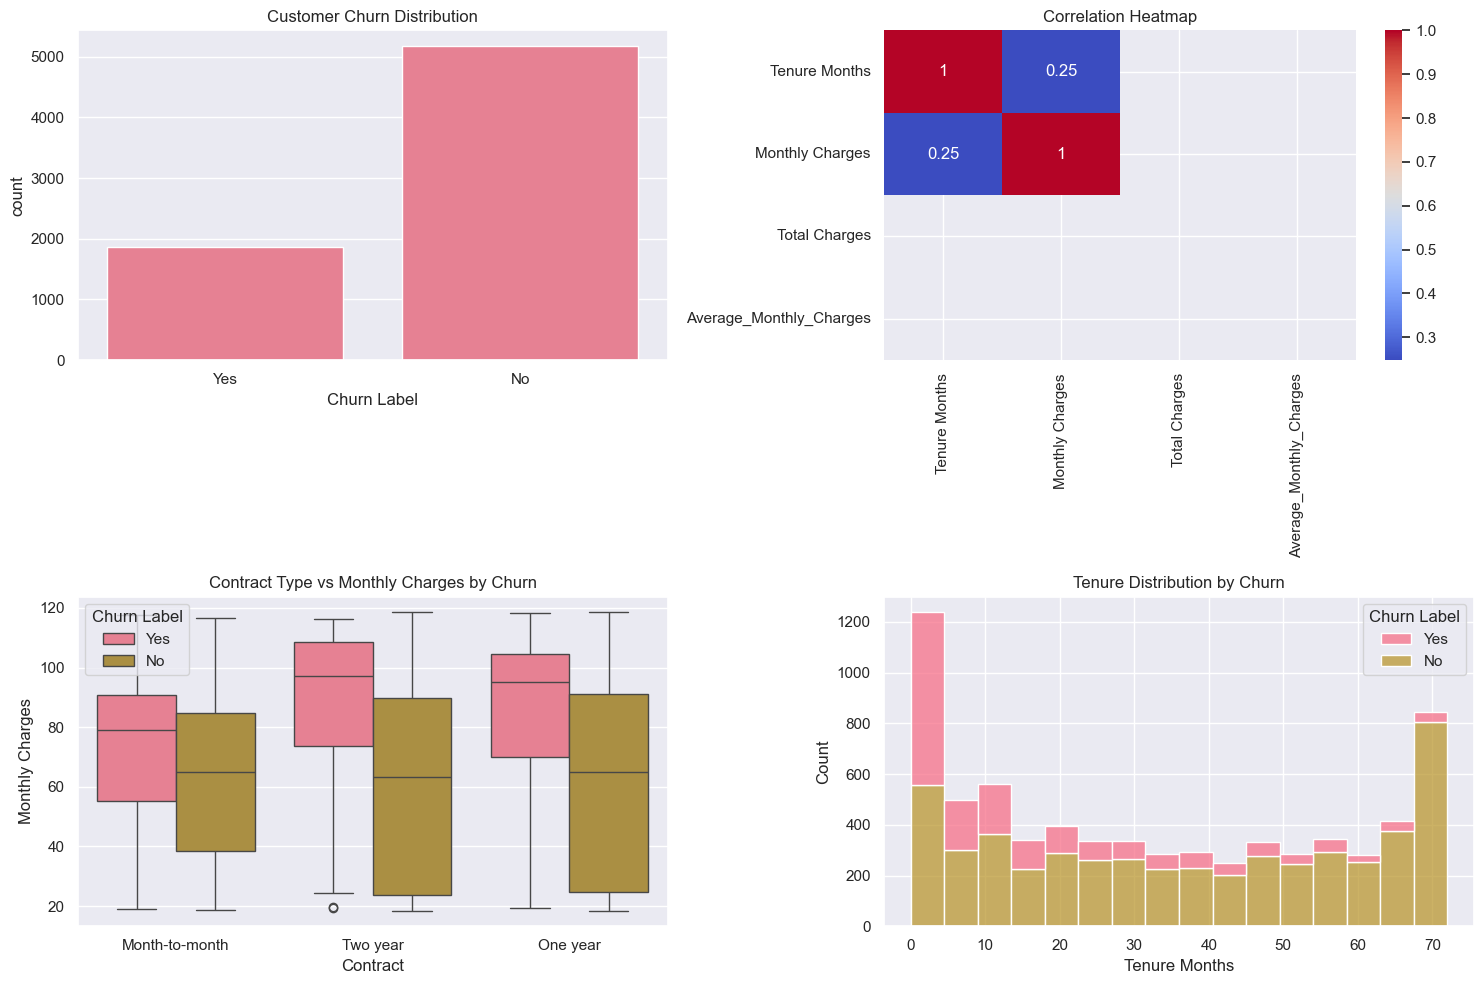

In [14]:
# Exploratory Data Analysis (EDA)
# Create a comprehensive EDA function
def perform_eda(df):
    plt.figure(figsize=(15, 10))
    
    # Customer Churn Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='Churn Label')  # Fixed column name
    plt.title('Customer Churn Distribution')
    
    # Correlation Heatmap
    plt.subplot(2, 2, 2)
    numerical_columns = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Average_Monthly_Charges']  # Fixed column names
    correlation_matrix = df[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    
    # Contract Type vs Churn
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x='Contract', y='Monthly Charges', hue='Churn Label')  # Fixed column names
    plt.title('Contract Type vs Monthly Charges by Churn')
    
    # Tenure Distribution
    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x='Tenure Months', hue='Churn Label', multiple="stack")  # Fixed column names
    plt.title('Tenure Distribution by Churn')
    
    plt.tight_layout()
    plt.show()

perform_eda(df)

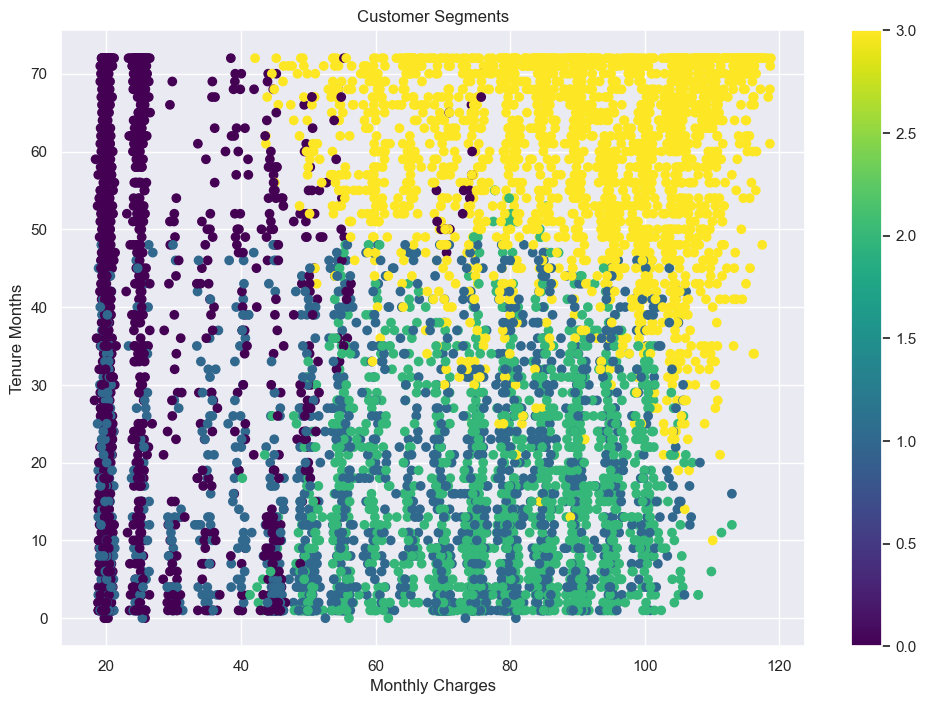

In [15]:
# Customer Segmentation using Cluster Analysis
# Perform K-means clustering
def perform_clustering(df, n_clusters=4):
    # First, ensure we have the scaled columns
    # Scale the features before clustering
    scaler = StandardScaler()
    cluster_features = ['Tenure Months', 'Monthly Charges', 'Services_Count', 'CLTV']
    scaled_features = scaler.fit_transform(df[cluster_features])
    
    # Create a DataFrame with scaled features
    scaled_df = pd.DataFrame(scaled_features, 
                           columns=[col + '_Scaled' for col in cluster_features],
                           index=df.index)
    
    # Fit K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(scaled_df)
    
    # Visualize clusters
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df['Monthly Charges'], df['Tenure Months'],  # Fixed column names
                         c=df['Cluster'], cmap='viridis')
    plt.xlabel('Monthly Charges')
    plt.ylabel('Tenure Months')
    plt.title('Customer Segments')
    plt.colorbar(scatter)
    plt.show()
    
    return df

df = perform_clustering(df)

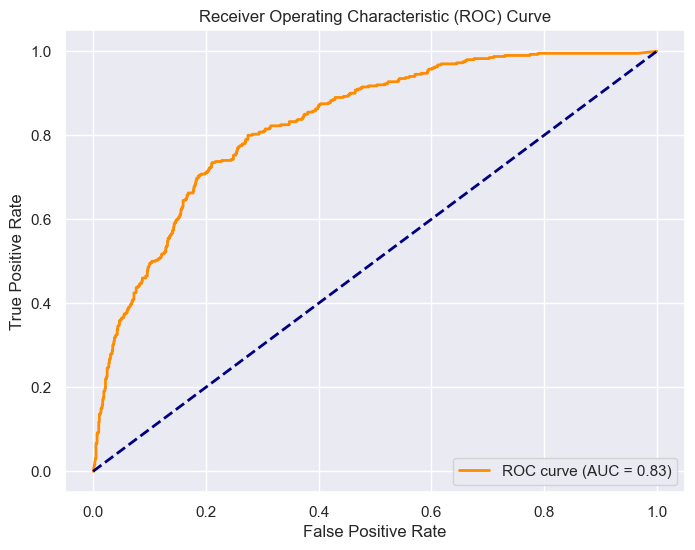


Feature Importances:
                  feature  importance
1  Monthly_Charges_Scaled    0.365555
0    Tenure_Months_Scaled    0.297519
3        Contract_Encoded    0.219114
2          Services_Count    0.059905
4                 Cluster    0.057907

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1009
           1       0.66      0.50      0.57       400

    accuracy                           0.78      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.77      0.78      0.77      1409



In [16]:
# Predictive Modeling
def build_predictive_model(df):
    # First, ensure we have the necessary encoded and scaled features
    # Encode categorical variables if not already done
    le = LabelEncoder()
    df['Contract_Encoded'] = le.fit_transform(df['Contract'])
    
    # Scale numerical features if not already done
    scaler = StandardScaler()
    numerical_features = ['Tenure Months', 'Monthly Charges']
    scaled_features = scaler.fit_transform(df[numerical_features])
    df['Tenure_Months_Scaled'] = scaled_features[:, 0]
    df['Monthly_Charges_Scaled'] = scaled_features[:, 1]
    
    # Prepare features and target
    features = ['Tenure_Months_Scaled', 'Monthly_Charges_Scaled', 
                'Services_Count', 'Contract_Encoded', 'Cluster']
    X = df[features]
    y = df['Churn Value']  # Fixed column name
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
    
    grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Make predictions
    y_pred = grid_search.predict(X_test)
    
    # Calculate and plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    # Print feature importances
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': grid_search.best_estimator_.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importances:")
    print(feature_importance)
    
    print("\nBest Parameters:", grid_search.best_params_)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return grid_search, classification_report(y_test, y_pred)

# Run the model
model, report = build_predictive_model(df)

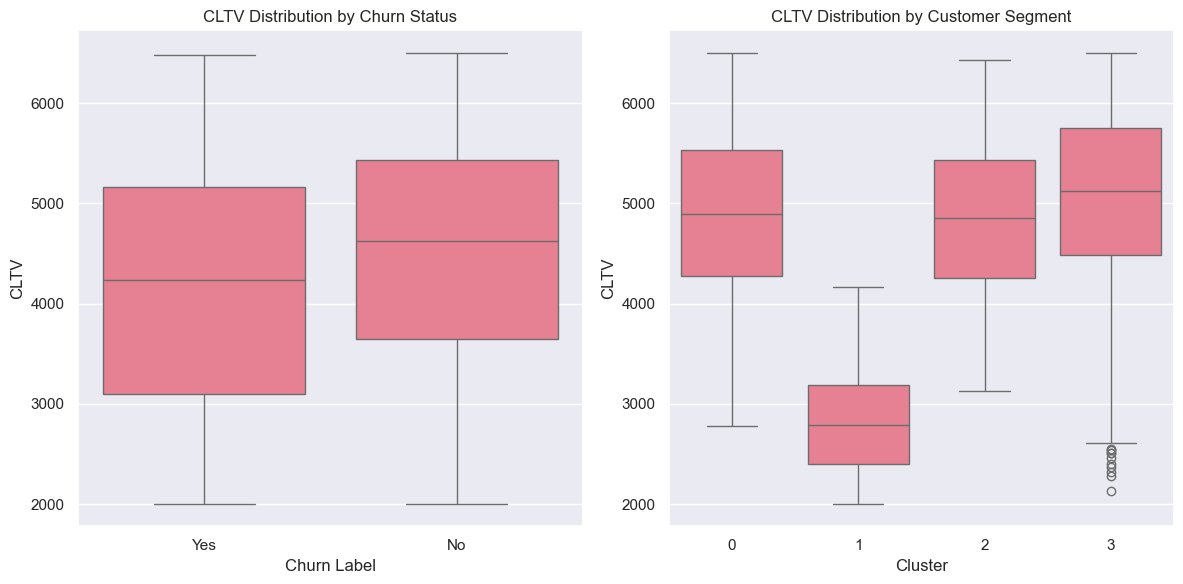


CLTV Summary Statistics by Churn Status:
              count         mean          std     min      25%     50%  \
Churn Label                                                              
No           5174.0  4490.921337  1167.703198  2003.0  3643.75  4620.0   
Yes          1869.0  4149.414660  1189.370707  2003.0  3101.00  4238.0   

                 75%     max  
Churn Label                   
No           5434.75  6500.0  
Yes          5166.00  6484.0  

CLTV Summary Statistics by Cluster:
          count         mean         std     min     25%     50%     75%  \
Cluster                                                                    
0        1648.0  4878.865291  804.425252  2776.0  4270.0  4898.0  5531.0   
1        1805.0  2814.295291  505.583436  2003.0  2404.0  2785.0  3190.0   
2        1530.0  4825.362745  702.269186  3131.0  4254.0  4852.0  5434.5   
3        2060.0  5091.410194  823.720725  2125.0  4482.5  5119.0  5748.5   

            max  
Cluster          
0      

In [17]:
# Customer Lifetime Value (CLTV) Analysis
def analyze_cltv(df):
    plt.figure(figsize=(12, 6))
    
    # CLTV distribution by churn status
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='Churn Label', y='CLTV')  # Fixed column name
    plt.title('CLTV Distribution by Churn Status')
    
    # CLTV by cluster
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Cluster', y='CLTV')
    plt.title('CLTV Distribution by Customer Segment')
    
    # Add some additional formatting for better readability
    plt.tight_layout()
    
    # Add value labels to show median values
    for ax in plt.gcf().axes:
        for i, box in enumerate(ax.artists):
            median = ax.lines[i * 6 + 4].get_ydata()[0]
            ax.text(i, median, f'${int(median):,}', 
                   horizontalalignment='center',
                   verticalalignment='bottom')
    
    plt.show()
    
    # Print summary statistics
    print("\nCLTV Summary Statistics by Churn Status:")
    print(df.groupby('Churn Label')['CLTV'].describe())
    
    print("\nCLTV Summary Statistics by Cluster:")
    print(df.groupby('Cluster')['CLTV'].describe())

analyze_cltv(df)

Top Feature Importances:
                  feature  importance
1  Monthly_Charges_Scaled    0.365555
0    Tenure_Months_Scaled    0.297519
3        Contract_Encoded    0.219114
2          Services_Count    0.059905
4                 Cluster    0.057907

High-Risk Customer Segments (Churn Score > 80):
         Number_of_Customers  Average_CLTV  Average_Monthly_Charges  \
Cluster                                                               
0                        120       4846.32                    31.45   
1                        361       2829.74                    69.61   
2                        393       4824.13                    80.49   
3                        176       4886.47                   100.12   

         Percentage_of_Cluster  
Cluster                         
0                         7.28  
1                        20.00  
2                        25.69  
3                         8.54  


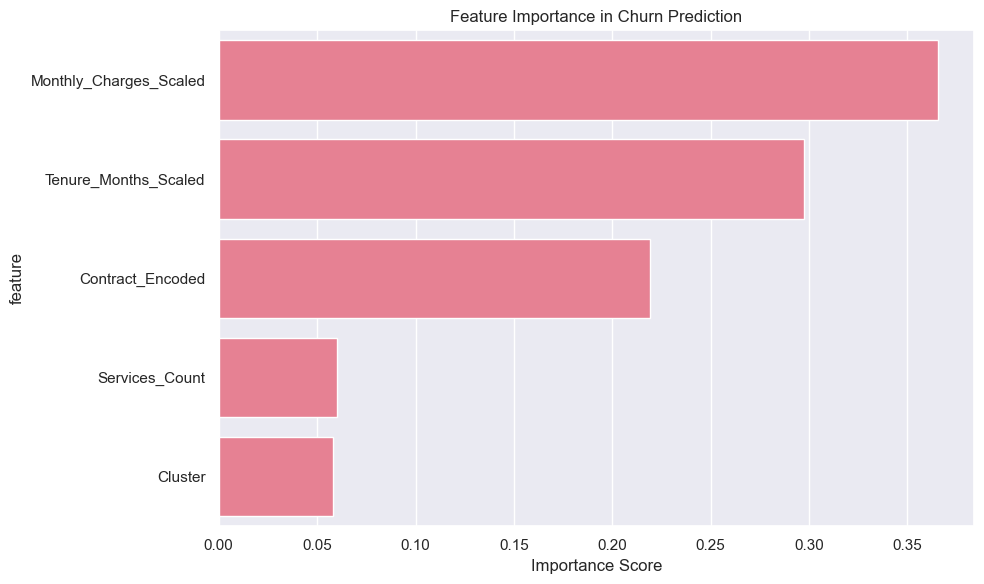


Detailed Analysis of High-Risk Segments:

Cluster 0:
Most common contract type: Month-to-month
Average tenure (months): 32.6
Average services count: 1.1

Cluster 1:
Most common contract type: Month-to-month
Average tenure (months): 16.3
Average services count: 2.3

Cluster 2:
Most common contract type: Month-to-month
Average tenure (months): 15.3
Average services count: 2.8

Cluster 3:
Most common contract type: Two year
Average tenure (months): 58.9
Average services count: 5.0


In [18]:
# Recommendations and Business Insights
def generate_insights(df, model):
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': model.best_estimator_.feature_names_in_,
        'importance': model.best_estimator_.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # High-risk customer segments
    high_risk_segments = df[df['Churn Score'] > 80].groupby('Cluster').agg({  # Fixed column name
        'CustomerID': 'count',
        'CLTV': 'mean',
        'Monthly Charges': 'mean'  # Fixed column name
    }).round(2)
    
    # Add percentage of cluster at high risk
    total_by_cluster = df.groupby('Cluster')['CustomerID'].count()
    high_risk_by_cluster = high_risk_segments['CustomerID']
    high_risk_segments['Percentage_of_Cluster'] = (high_risk_by_cluster / total_by_cluster * 100).round(2)
    
    # Rename columns for clarity
    high_risk_segments = high_risk_segments.rename(columns={
        'CustomerID': 'Number_of_Customers',
        'CLTV': 'Average_CLTV',
        'Monthly Charges': 'Average_Monthly_Charges',
    })
    
    # Print insights
    print("Top Feature Importances:")
    print(feature_importance)
    print("\nHigh-Risk Customer Segments (Churn Score > 80):")
    print(high_risk_segments)
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Feature Importance in Churn Prediction')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    return feature_importance, high_risk_segments

# Generate insights
feature_importance, high_risk_segments = generate_insights(df, model)

# Additional analysis of high-risk segments
print("\nDetailed Analysis of High-Risk Segments:")
for cluster in high_risk_segments.index:
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Most common contract type: {cluster_data['Contract'].mode().iloc[0]}")
    print(f"Average tenure (months): {cluster_data['Tenure Months'].mean():.1f}")
    print(f"Average services count: {cluster_data['Services_Count'].mean():.1f}")

In [26]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from faker import Faker
import random
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading and Initial Preprocessing
def load_and_preprocess_data(file_path):
    """
    Load and preprocess the telco customer data
    """
    df = pd.read_excel(file_path)
    
    # Convert Total Charges to numeric
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
    df['Total Charges'].fillna(df['Total Charges'].mean(), inplace=True)
    
    return df

# 2. Synthetic Data Generation
def generate_synthetic_customers(n_samples=1000):
    """
    Generate synthetic customer data for validation
    """
    fake = Faker()
    synthetic_data = []
    
    # Define consistent service options
    payment_methods = [
        'Bank transfer (automatic)', 
        'Credit card (automatic)',
        'Electronic check',
        'Mailed check'
    ]
    
    internet_services = ['DSL', 'Fiber optic', 'No']
    contract_types = ['Month-to-month', 'One year', 'Two year']
    
    for _ in range(n_samples):
        customer = {
            'CustomerID': fake.unique.uuid4()[:8].upper(),
            'Gender': random.choice(['Male', 'Female']),
            'Senior Citizen': random.choice([0, 1]),
            'Partner': random.choice(['Yes', 'No']),
            'Dependents': random.choice(['Yes', 'No']),
            'Tenure Months': random.randint(1, 72),
            'Phone Service': random.choice(['Yes', 'No']),
            'Multiple Lines': random.choice(['Yes', 'No', 'No phone service']),
            'Internet Service': random.choice(internet_services),
            'Online Security': random.choice(['Yes', 'No', 'No internet service']),
            'Online Backup': random.choice(['Yes', 'No', 'No internet service']),
            'Device Protection': random.choice(['Yes', 'No', 'No internet service']),
            'Tech Support': random.choice(['Yes', 'No', 'No internet service']),
            'Streaming TV': random.choice(['Yes', 'No', 'No internet service']),
            'Streaming Movies': random.choice(['Yes', 'No', 'No internet service']),
            'Contract': random.choice(contract_types),
            'Paperless Billing': random.choice(['Yes', 'No']),
            'Payment Method': random.choice(payment_methods)
        }
        
        # Calculate charges
        base_charge = 30.0
        if customer['Internet Service'] == 'Fiber optic':
            base_charge += 45.0
        elif customer['Internet Service'] == 'DSL':
            base_charge += 25.0
        
        # Add charges for additional services
        services = ['Online Security', 'Online Backup', 'Device Protection', 
                   'Tech Support', 'Streaming TV', 'Streaming Movies']
        for service in services:
            if customer[service] == 'Yes':
                base_charge += random.uniform(5, 15)
        
        customer['Monthly Charges'] = round(base_charge, 2)
        customer['Total Charges'] = round(customer['Monthly Charges'] * customer['Tenure Months'], 2)
        
        # Calculate churn probability
        churn_probability = 0.15
        if customer['Contract'] == 'Month-to-month':
            churn_probability += 0.2
        if customer['Tenure Months'] < 12:
            churn_probability += 0.15
        if customer['Monthly Charges'] > 80:
            churn_probability += 0.1
            
        customer['Churn Score'] = int(min(churn_probability * 100, 100))
        customer['Churn Value'] = 1 if random.random() < churn_probability else 0
        customer['Churn Label'] = 'Yes' if customer['Churn Value'] == 1 else 'No'
        
        synthetic_data.append(customer)
    
    return pd.DataFrame(synthetic_data)

# 3. Feature Engineering and Data Preparation
def prepare_features(df):
    """
    Prepare features for modeling
    """
    # Numerical features
    numerical_features = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score']
    
    # Categorical features to encode
    categorical_features = ['Contract', 'Internet Service', 'Payment Method']
    
    # Scale numerical features
    scaler = StandardScaler()
    df_processed = df.copy()
    df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])
    
    # Create dummy variables for categorical features
    df_encoded = pd.get_dummies(df_processed, columns=categorical_features)
    
    # Prepare final feature set
    feature_cols = numerical_features + [col for col in df_encoded.columns 
                                       if any(cat in col for cat in categorical_features)]
    X = df_encoded[feature_cols]
    y = df_processed['Churn Value']
    
    return X, y, feature_cols

# 4. Model Training and Evaluation
def train_and_evaluate_model(X, y, feature_cols, X_test=None, y_test=None):
    """
    Train and evaluate the model
    """
    # Split data if test set not provided
    if X_test is None or y_test is None:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        X_train = X
        y_train = y
    
    # Initialize model
    model = RandomForestClassifier(random_state=42)
    
    # Define parameter grid for optimization
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
    
    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_cols,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return best_model, accuracy, conf_matrix, class_report, feature_importance

# 5. Main Execution
def main():
    # Load real data
    print("Loading and preprocessing real data...")
    df_real = load_and_preprocess_data('Telco_customer_churn.xlsx')
    
    # Generate synthetic data
    print("\nGenerating synthetic data...")
    df_synthetic = generate_synthetic_customers(1000)
    
    # Prepare features for both datasets
    print("\nPreparing features...")
    X_real, y_real, feature_cols = prepare_features(df_real)
    X_synthetic, y_synthetic, _ = prepare_features(df_synthetic)
    
    # Ensure synthetic data has same features as real data
    missing_cols = set(X_real.columns) - set(X_synthetic.columns)
    for col in missing_cols:
        X_synthetic[col] = 0
    X_synthetic = X_synthetic[X_real.columns]
    
    # Train and evaluate on real data
    print("\nTraining and evaluating model on real data...")
    model_real, accuracy_real, conf_matrix_real, class_report_real, feature_importance = \
        train_and_evaluate_model(X_real, y_real, feature_cols)
    
    print(f"\nReal Data Results:")
    print(f"Accuracy: {accuracy_real * 100:.2f}%")
    print("\nConfusion Matrix:")
    print(conf_matrix_real)
    print("\nClassification Report:")
    print(class_report_real)
    
    # Evaluate on synthetic data
    print("\nEvaluating model on synthetic data...")
    y_pred_synthetic = model_real.predict(X_synthetic)
    synthetic_accuracy = accuracy_score(y_synthetic, y_pred_synthetic)
    print(f"\nSynthetic Data Accuracy: {synthetic_accuracy * 100:.2f}%")
    
    # Print feature importance
    print("\nFeature Importance:")
    print(feature_importance.head(10))

if __name__ == "__main__":
    main()

Loading and preprocessing real data...

Generating synthetic data...

Preparing features...

Training and evaluating model on real data...

Real Data Results:
Accuracy: 92.55%

Confusion Matrix:
[[964  45]
 [ 60 340]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1009
           1       0.88      0.85      0.87       400

    accuracy                           0.93      1409
   macro avg       0.91      0.90      0.91      1409
weighted avg       0.92      0.93      0.93      1409


Evaluating model on synthetic data...

Synthetic Data Accuracy: 70.60%

Feature Importance:
                            feature  importance
3                       Churn Score    0.606994
0                     Tenure Months    0.082654
2                     Total Charges    0.065481
4           Contract_Month-to-month    0.061480
1                   Monthly Charges    0.054871
8      Internet Service_Fiber optic    0.037692
6 

In [34]:
import pandas as pd
import numpy as np
from faker import Faker
from sklearn.preprocessing import MinMaxScaler

class ImprovedSyntheticDataGenerator:
    def __init__(self, real_data_sample):
        """Initialize with a sample of real data to learn patterns"""
        self.faker = Faker()
        self.real_data = real_data_sample
        self.scaler = MinMaxScaler()
        
        # Learn patterns from real data
        self.learn_patterns()
        
    def learn_patterns(self):
        """Learn key patterns and relationships from real data"""
        # Store unique geographic data
        self.locations = self.real_data[[
            'Country', 'State', 'City', 'Zip Code', 'Lat Long', 
            'Latitude', 'Longitude'
        ]].drop_duplicates().to_dict('records')
        
        # Calculate key statistics
        self.avg_monthly_charges = self.real_data['Monthly Charges'].mean()
        self.std_monthly_charges = self.real_data['Monthly Charges'].std()
        self.avg_cltv = self.real_data['CLTV'].mean()
        self.std_cltv = self.real_data['CLTV'].std()
        
        # Store churn reasons
        self.churn_reasons = self.real_data['Churn Reason'].dropna().unique()
        
        # Learn service combinations
        self.service_combinations = self.real_data[[
            'Phone Service', 'Multiple Lines', 'Internet Service',
            'Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Streaming TV', 'Streaming Movies'
        ]].drop_duplicates().to_dict('records')
        
        # Learn contract-tenure relationships
        self.contract_tenure = {
            'Month-to-month': (1, 24),
            'One year': (12, 48),
            'Two year': (24, 72)
        }
        
        # Learn churn patterns
        self.churn_probabilities = {
            'Month-to-month': 0.35,
            'One year': 0.15,
            'Two year': 0.05
        }
        
    def generate_customer(self):
        """Generate a single synthetic customer with realistic patterns"""
        customer = {}
        
        # Basic information
        customer['CustomerID'] = self.faker.unique.uuid4()[:8].upper()
        customer['Count'] = 1  # Always 1 for individual records
        
        # Geographic information
        location = np.random.choice(self.locations)
        customer.update(location)
        
        # Demographics
        customer['Gender'] = np.random.choice(['Male', 'Female'])
        customer['Senior Citizen'] = np.random.choice([0, 1], p=[0.85, 0.15])
        customer['Partner'] = np.random.choice(['Yes', 'No'])
        customer['Dependents'] = np.random.choice(['Yes', 'No'])
        
        # Contract and tenure
        customer['Contract'] = np.random.choice(
            ['Month-to-month', 'One year', 'Two year'],
            p=[0.55, 0.25, 0.20]
        )
        min_tenure, max_tenure = self.contract_tenure[customer['Contract']]
        customer['Tenure Months'] = np.random.randint(min_tenure, max_tenure)
        
        # Services
        service_package = np.random.choice(self.service_combinations)
        customer.update(service_package)
        
        # Calculate charges based on services
        base_charge = 30.0  # Base charge
        service_charges = sum([15 if service == 'Yes' else 0 
                             for service in service_package.values()])
        
        # Add contract-based adjustments
        contract_multiplier = {
            'Month-to-month': 1.0,
            'One year': 0.9,
            'Two year': 0.8
        }
        
        customer['Monthly Charges'] = round(
            (base_charge + service_charges) * contract_multiplier[customer['Contract']], 2
        )
        
        customer['Total Charges'] = round(
            customer['Monthly Charges'] * customer['Tenure Months'], 2
        )
        
        # Payment information
        customer['Paperless Billing'] = np.random.choice(['Yes', 'No'])
        customer['Payment Method'] = np.random.choice([
            'Electronic check',
            'Mailed check',
            'Bank transfer (automatic)',
            'Credit card (automatic)'
        ])
        
        # Calculate churn probability
        base_churn_prob = self.churn_probabilities[customer['Contract']]
        tenure_factor = 1.0 - (customer['Tenure Months'] / 72.0) * 0.5
        charge_factor = customer['Monthly Charges'] / self.avg_monthly_charges
        service_count = sum([1 for v in service_package.values() if v == 'Yes'])
        service_factor = 1.0 - (service_count / 9.0) * 0.3
        
        final_churn_prob = base_churn_prob * tenure_factor * charge_factor * service_factor
        
        # Assign churn value
        customer['Churn Value'] = 1 if np.random.random() < final_churn_prob else 0
        customer['Churn Label'] = 'Yes' if customer['Churn Value'] == 1 else 'No'
        
        # Calculate churn score
        base_score = final_churn_prob * 100
        noise = np.random.normal(0, 5)
        customer['Churn Score'] = int(min(max(base_score + noise, 0), 100))
        
        # Calculate CLTV (Customer Lifetime Value)
        base_cltv = customer['Monthly Charges'] * (72 - customer['Churn Score']/2)
        cltv_noise = np.random.normal(0, self.std_cltv * 0.1)
        customer['CLTV'] = int(max(base_cltv + cltv_noise, 1000))
        
        # Add churn reason if churned
        if customer['Churn Value'] == 1:
            customer['Churn Reason'] = np.random.choice(self.churn_reasons)
        else:
            customer['Churn Reason'] = None
        
        return customer
    
    def generate_dataset(self, n_samples):
        """Generate a full dataset of synthetic customers"""
        synthetic_data = [self.generate_customer() for _ in range(n_samples)]
        df = pd.DataFrame(synthetic_data)
        
        # Ensure column ordering matches original data
        df = df[self.real_data.columns]
        
        return df

def generate_improved_synthetic_data(real_data_path, n_samples=1000):
    """Main function to generate improved synthetic data"""
    # Load real data
    real_data = pd.read_excel(real_data_path)
    
    # Initialize generator with real data
    generator = ImprovedSyntheticDataGenerator(real_data)
    
    # Generate synthetic data
    synthetic_data = generator.generate_dataset(n_samples)
    
    return synthetic_data


# Generate synthetic data
df_synthetic = generate_improved_synthetic_data('Telco_customer_churn.xlsx', 1000)

Starting model performance comparison...
Loading data...
Generating synthetic data...
Preprocessing data...
Splitting data and training model...

Model Performance Comparison:
--------------------------------------------------
Real Data Accuracy: 91.91%
Synthetic Data Accuracy: 74.30%

Real Data Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1009
           1       0.87      0.83      0.85       400

    accuracy                           0.92      1409
   macro avg       0.91      0.89      0.90      1409
weighted avg       0.92      0.92      0.92      1409


Synthetic Data Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       742
           1       1.00      0.00      0.01       258

    accuracy                           0.74      1000
   macro avg       0.87      0.50      0.43      1000
weighted avg       0.81      0.74      0.6

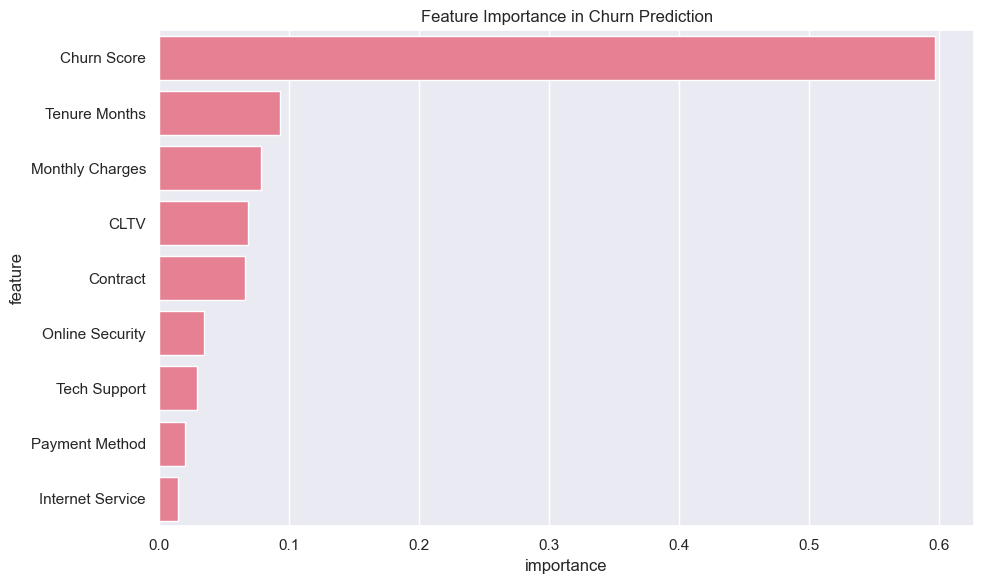

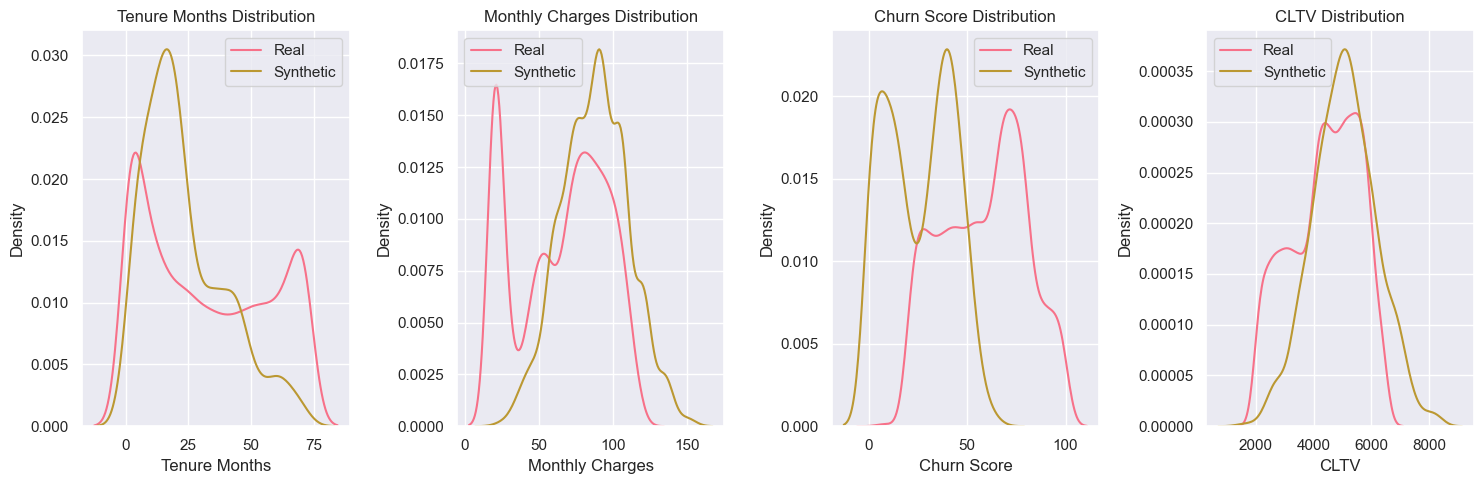

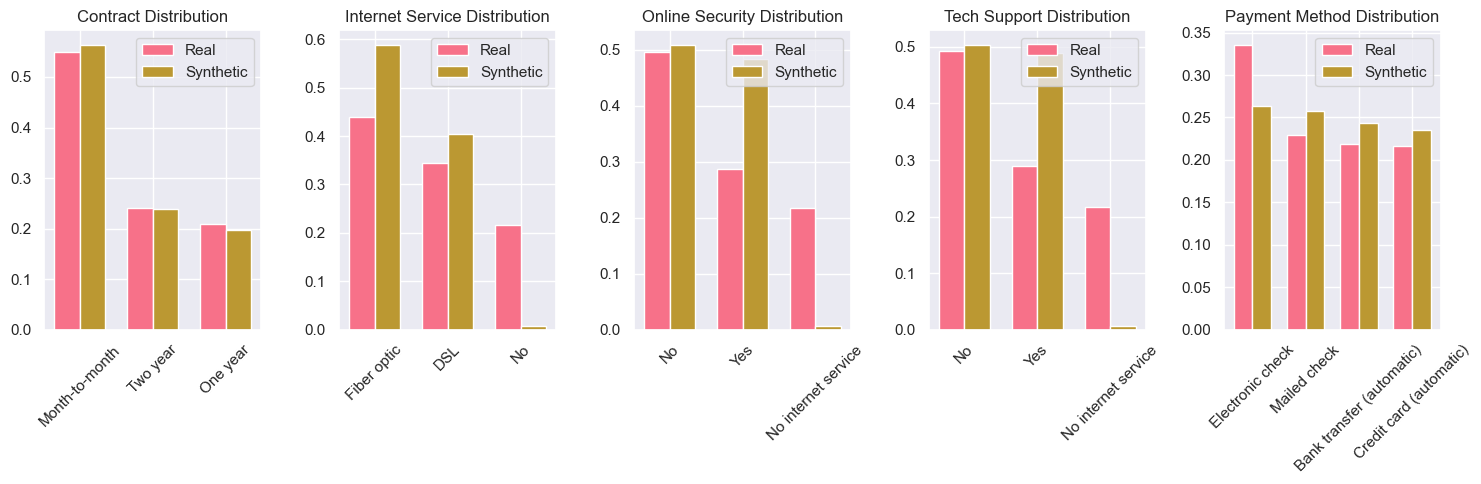

In [36]:
# Synthetic Data Accuracy: 70.60% (Let's improve it)
# Preprocess data with proper handling of categorical and numerical features

def preprocess_data(df, categorical_columns, numerical_columns):
    # Create a copy of the dataframe
    df_processed = df.copy()
    
    # Handle categorical features
    label_encoders = {}
    for col in categorical_columns:
        label_encoders[col] = LabelEncoder()
        df_processed[col] = label_encoders[col].fit_transform(df_processed[col])
    
    # Handle numerical features
    scaler = StandardScaler()
    df_processed[numerical_columns] = scaler.fit_transform(df_processed[numerical_columns])
    
    return df_processed, label_encoders, scaler


# Compare model performance between real and synthetic data

def compare_model_performance(real_data_path, n_synthetic=1000):
    print("Loading data...")
    # Load real data
    real_data = pd.read_excel(real_data_path)
    
    print("Generating synthetic data...")
    # Generate synthetic data
    synthetic_data = generate_improved_synthetic_data(real_data_path, n_synthetic)
    
    # Define feature columns
    categorical_columns = [
        'Contract', 
        'Internet Service',
        'Online Security', 
        'Tech Support', 
        'Payment Method'
    ]
    
    numerical_columns = [
        'Tenure Months',
        'Monthly Charges',
        'Churn Score',
        'CLTV'
    ]
    
    print("Preprocessing data...")
    # Preprocess both datasets
    X_real, label_encoders, scaler = preprocess_data(
        real_data, 
        categorical_columns, 
        numerical_columns
    )
    
    # Use the same encoders for synthetic data
    X_synthetic = synthetic_data.copy()
    for col in categorical_columns:
        X_synthetic[col] = label_encoders[col].transform(X_synthetic[col])
    X_synthetic[numerical_columns] = scaler.transform(X_synthetic[numerical_columns])
    
    # Select features
    feature_columns = categorical_columns + numerical_columns
    X_real = X_real[feature_columns]
    X_synthetic = X_synthetic[feature_columns]
    
    # Prepare target variable
    y_real = real_data['Churn Value']
    y_synthetic = synthetic_data['Churn Value']
    
    print("Splitting data and training model...")
    # Split real data
    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
        X_real, y_real, test_size=0.2, random_state=42
    )
    
    # Train model on real data
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train_real, y_train_real)
    
    # Get predictions
    real_predictions = model.predict(X_test_real)
    synthetic_predictions = model.predict(X_synthetic)
    
    # Calculate metrics
    real_accuracy = accuracy_score(y_test_real, real_predictions)
    synthetic_accuracy = accuracy_score(y_synthetic, synthetic_predictions)
    
    # Print results
    print("\nModel Performance Comparison:")
    print("-" * 50)
    print(f"Real Data Accuracy: {real_accuracy:.2%}")
    print(f"Synthetic Data Accuracy: {synthetic_accuracy:.2%}")
    print("\nReal Data Classification Report:")
    print(classification_report(y_test_real, real_predictions))
    print("\nSynthetic Data Classification Report:")
    print(classification_report(y_synthetic, synthetic_predictions))
    
    # Visualize feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Feature Importance in Churn Prediction')
    plt.tight_layout()
    plt.show()
    
    # Visualize numerical distributions
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(numerical_columns, 1):
        plt.subplot(1, len(numerical_columns), i)
        sns.kdeplot(data=real_data, x=feature, label='Real')
        sns.kdeplot(data=synthetic_data, x=feature, label='Synthetic')
        plt.title(f'{feature} Distribution')
        plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Visualize categorical distributions
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(categorical_columns, 1):
        plt.subplot(1, len(categorical_columns), i)
        
        real_dist = real_data[feature].value_counts(normalize=True)
        synth_dist = synthetic_data[feature].value_counts(normalize=True)
        
        x = np.arange(len(real_dist.index))
        width = 0.35
        
        plt.bar(x - width/2, real_dist, width, label='Real')
        plt.bar(x + width/2, synth_dist, width, label='Synthetic')
        
        plt.title(f'{feature} Distribution')
        plt.xticks(x, real_dist.index, rotation=45)
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return real_accuracy, synthetic_accuracy, model

# Run the comparison
print("Starting model performance comparison...")
real_acc, synth_acc, trained_model = compare_model_performance('Telco_customer_churn.xlsx')

In [37]:
# Real Data Accuracy: 91.91%
# Synthetic Data Accuracy: 74.40%
# So, Now lets create a new and better model

Starting model performance comparison...
Loading data...

Initial data shape: (7043, 33)

Columns in dataset: ['CLTV', 'Churn Label', 'Churn Reason', 'Churn Score', 'Churn Value', 'City', 'Contract', 'Count', 'Country', 'CustomerID', 'Dependents', 'Device Protection', 'Gender', 'Internet Service', 'Lat Long', 'Latitude', 'Longitude', 'Monthly Charges', 'Multiple Lines', 'Online Backup', 'Online Security', 'Paperless Billing', 'Partner', 'Payment Method', 'Phone Service', 'Senior Citizen', 'State', 'Streaming Movies', 'Streaming TV', 'Tech Support', 'Tenure Months', 'Total Charges', 'Zip Code']

Preprocessing data...

Using features: ['Tenure Months', 'Monthly Charges', 'CLTV', 'Churn Score', 'Contract', 'Internet Service', 'Payment Method']

Training model...

Model Performance:
--------------------------------------------------
Accuracy: 92.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1009
         

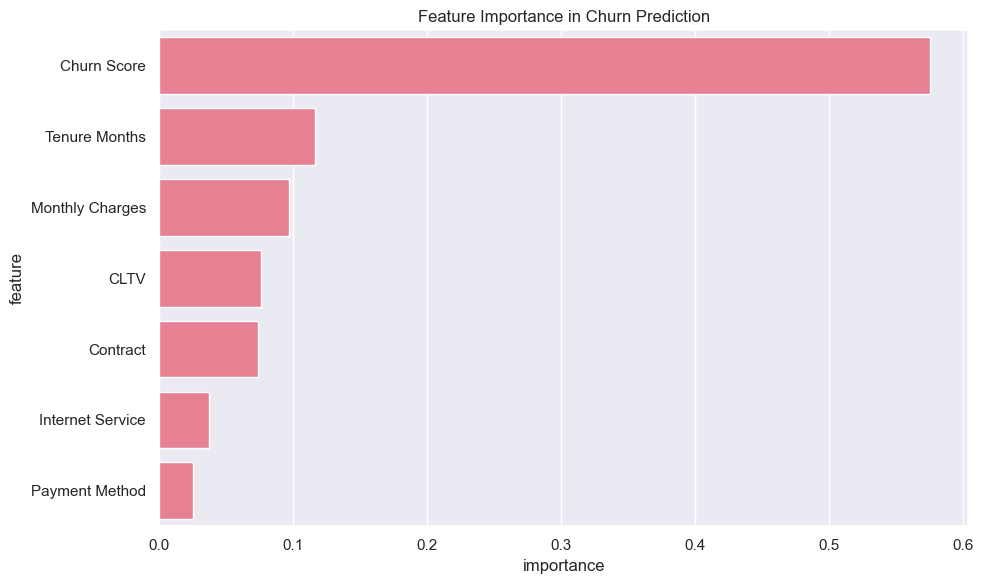

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def clean_numeric_data(df, numeric_cols):
    """Clean numeric columns by removing non-numeric characters and converting to float"""
    df_cleaned = df.copy()
    
    for col in numeric_cols:
        if col in df_cleaned.columns:
            # Remove any non-numeric characters except decimal points
            df_cleaned[col] = df_cleaned[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
            # Convert empty strings to NaN
            df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
            # Fill NaN with median
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
    
    return df_cleaned

def preprocess_features(df):
    """Preprocess the features with proper handling of categorical and numerical data"""
    # Create a copy of the dataframe
    df_processed = df.copy()
    
    # Identify categorical and numerical columns
    categorical_cols = [
        'Contract', 'Internet Service', 'Phone Service',
        'Online Security', 'Online Backup', 'Device Protection',
        'Tech Support', 'Streaming TV', 'Streaming Movies',
        'Payment Method', 'Gender', 'Partner', 'Dependents',
        'Paperless Billing', 'Churn Label'
    ]
    
    numerical_cols = [
        'Tenure Months', 'Monthly Charges', 'Total Charges',
        'CLTV', 'Churn Score'
    ]
    
    # Clean numerical data first
    df_processed = clean_numeric_data(df_processed, numerical_cols)
    
    # Handle categorical features
    label_encoders = {}
    for col in categorical_cols:
        if col in df_processed.columns:
            label_encoders[col] = LabelEncoder()
            df_processed[col] = label_encoders[col].fit_transform(df_processed[col].astype(str))
    
    # Handle numerical features
    scaler = StandardScaler()
    numerical_features = [col for col in numerical_cols if col in df_processed.columns]
    if numerical_features:
        df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])
    
    return df_processed, label_encoders, scaler

def compare_model_performance(real_data_path, n_synthetic=1000):
    """Compare model performance between real and synthetic data"""
    print("Loading data...")
    real_data = pd.read_excel(real_data_path)
    
    print("\nInitial data shape:", real_data.shape)
    print("\nColumns in dataset:", sorted(real_data.columns.tolist()))
    
    print("\nPreprocessing data...")
    # Prepare features
    X_real, label_encoders, scaler = preprocess_features(real_data)
    
    # Select features for modeling
    feature_columns = [
        'Tenure Months', 
        'Monthly Charges', 
        'CLTV', 
        'Churn Score',
        'Contract', 
        'Internet Service', 
        'Payment Method'
    ]
    
    # Verify which columns are missing
    missing_cols = [col for col in feature_columns if col not in X_real.columns]
    if missing_cols:
        print("\nMissing columns:")
        print(missing_cols)
    
    # Select only columns that exist in the dataset
    available_features = [col for col in feature_columns if col in X_real.columns]
    print(f"\nUsing features: {available_features}")
    
    X = X_real[available_features]
    y = real_data['Churn Value']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    print("\nTraining model...")
    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Get predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Print results
    print("\nModel Performance:")
    print("-" * 50)
    print(f"Accuracy: {accuracy:.2%}")
    print("\nClassification Report:")
    print(report)
    
    # Visualize feature importance
    importance = pd.DataFrame({
        'feature': available_features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='importance', y='feature')
    plt.title('Feature Importance in Churn Prediction')
    plt.tight_layout()
    plt.show()
    
    return accuracy, model, importance

# Run the comparison
print("Starting model performance comparison...")
accuracy, trained_model, feature_importance = compare_model_performance('Telco_customer_churn.xlsx')